# **1. Data Analysis**

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import string
import math
import time

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Set up visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...



 All libraries imported successfully!


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [2]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving AI_vs_huam_train_dataset.xlsx to AI_vs_huam_train_dataset.xlsx
Saving Final_test_data.csv to Final_test_data.csv


In [3]:
# Read Data
df_train = pd.read_excel('AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('Final_test_data.csv')

In [4]:
print("Dataset Information:")
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Columns: {df_train.columns.tolist()}")

# Show first few rows
print("\nFirst 5 rows of training data:")
print(df_train.head())

# Check sentiment distribution
print("\nLabel distribution:")
print(df_train['label'].value_counts())

Dataset Information:
Training data shape: (3728, 2)
Test data shape: (869, 2)
Columns: ['essay', 'label']

First 5 rows of training data:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0

Label distribution:
label
0    1864
1    1864
Name: count, dtype: int64


In [6]:
df_train.groupby('label').describe()

essay                                                               
      count unique                                                top freq
label                                                                     
0      1864   1864  Eessential way to succeed is trying new things...    1
1      1864   1864  The key to success is trying new things while ...    1

# **2. Text Preprocessing**

In [5]:
#  Advanced Text Preprocessing with Lemmatization

class TextPreprocessor:
    """
    Advanced text preprocessing class with lemmatization
    This will clean text better than basic preprocessing
    """

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words
        self.stop_words.update(['u', 'ur', 'im', 'dont', 'doin', 'ure'])

    def get_wordnet_pos(self, word):
        """Convert POS tag to format accepted by WordNet lemmatizer"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def clean_text(self, text):
        """Basic text cleaning"""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs, emails, HTML tags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove digits
        text = re.sub(r'\d', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text

    def lemmatize_text(self, text):
        """Apply lemmatization with POS tagging"""
        tokens = word_tokenize(text)

        lemmatized_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Get POS tag and lemmatize
                pos_tag = self.get_wordnet_pos(token)
                lemmatized_token = self.lemmatizer.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemmatized_token)

        return ' '.join(lemmatized_tokens)

    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.clean_text(text)
        lemmatized_text = self.lemmatize_text(cleaned_text)
        return lemmatized_text

print("Text preprocessing class created!")

Text preprocessing class created!


In [6]:
# Apply Text Preprocessing to the "text" column

# Initialize the preprocessor
preprocessor = TextPreprocessor()

print("Applying advanced text preprocessing with lemmatization...")

# Apply preprocessing to training data
df_train['clean_essay'] = df_train['essay'].apply(preprocessor.preprocess)

# Apply preprocessing to test data
df_test['clean_essay'] = df_test['essay'].apply(preprocessor.preprocess)

print("Text preprocessing completed!")

Applying advanced text preprocessing with lemmatization...
Text preprocessing completed!


In [9]:
# Show examples of preprocessing
print("\nExamples of text preprocessing:")
print("Original:", df_train['essay'].iloc[0])
print("Processed:", df_train['clean_essay'].iloc[0])
print()
print("Original:", df_train['essay'].iloc[5])
print("Processed:", df_train['clean_essay'].iloc[5])


Examples of text preprocessing:
Original: International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.
On the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.
On the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the

In [10]:
# Show vocab after text cleaning
train_vocab = set(" ".join(df_train['clean_essay']).split())
test_vocab = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics after stopword removal ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics after stopword removal ===
Train unique words : 21,269
Test  unique words : 8,829


In [7]:
# Define features and target
X = df_train['clean_essay']
y = df_train['label']

print(f"Features (X): {len(X)} essay samples")
print(f"Target (y): {len(y)} labels")

Features (X): 3728 essay samples
Target (y): 3728 labels


In [8]:
# Split Data for Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)    # stratify=y Maintain label distribution

In [13]:
print("Data split completed:")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Training label distribution: {np.bincount(y_train)}")
print(f"Validation label distribution: {np.bincount(y_val)}")

Data split completed:
Training samples: 2982
Validation samples: 746
Training label distribution: [1491 1491]
Validation label distribution: [373 373]


# **3. Model Training and Testing**

In [9]:
# Create pipelines for each classifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# Basic SVM pipeline
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))), # optimal values found through testing
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', svm.SVC(probability=True, random_state=42, cache_size=1000)) # higher cache size to reduce training time
])

# Basic Decision Tree pipeline
dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('classifier', tree.DecisionTreeClassifier(random_state=42))
])

# Basic AdaBoost pipeline
ada_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('classifier', AdaBoostClassifier(random_state=42))
])

3.1: SVM Hyperparameter Tuning with GridSearchCV

In [18]:
print("\n Hyperparameter Tuning For SVM ")
print("-" * 45)

# Define SVM param grid, decreasing parameter amount due to intensive nature of SVM
svm_param_grid = {
'classifier__C': [0.1, 1, 10, 100],
'classifier__kernel': ['linear', 'rbf'],
'classifier__gamma': ['scale', 'auto', 0.001, 0.01] # for rbf kernel
}

# Perform Grid Search
svm_grid_search = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\nPerforming Grid Search for SVM Model...")
start_time = time.time()
svm_grid_search.fit(X_train, y_train)
svm_train_time = time.time() - start_time

print(f"Grid Search completed in {svm_train_time:.2f} seconds")
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best CV score: {svm_grid_search.best_score_:.4f}")

# Evaluate SVM model on validation set
svm_val_score = svm_grid_search.score(X_val, y_val)
print(f"SVM validation accuracy: {svm_val_score:.4f}")


 Hyperparameter Tuning For SVM 
---------------------------------------------

Performing Grid Search for SVM Model...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Grid Search completed in 2149.86 seconds
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best CV score: 0.9661
SVM validation accuracy: 0.9584


3.2: Decision Tree Hyperparameter Tuning with GridSearchCV

In [19]:
print("\n Hyperparameter Tuning For Decision Tree ")
print("-" * 45)

dt_param_grid = {
'classifier__criterion': ['gini', 'entropy'],
'classifier__max_depth': [10, 20, 30, None],
'classifier__min_samples_split': [2, 5, 10],
'classifier__min_samples_leaf': [1, 2, 4] }

# Perform Grid Search
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\nPerforming Grid Search for Decision Tree...")
start_time = time.time()
dt_grid_search.fit(X_train, y_train)
dt_train_time = time.time() - start_time

print(f"Grid Search completed in {dt_train_time:.2f} seconds")
print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best CV score: {dt_grid_search.best_score_:.4f}")

# Evaluate Decision Tree model on validation set
dt_val_score = dt_grid_search.score(X_val, y_val)
print(f"Decision Tree validation accuracy: {dt_val_score:.4f}")


 Hyperparameter Tuning For Decision Tree 
---------------------------------------------

Performing Grid Search for Decision Tree...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Grid Search completed in 348.41 seconds
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best CV score: 0.8675
Decision Tree validation accuracy: 0.8633


3.3: AdaBoost Hyperparameter Tuning with GridSearchCV

In [20]:
print("\n Hyperparameter Tuning For AdaBoost ")
print("-" * 45)

# Pull optimized classifiers for Decision Tree and SVM
optimized_dt = dt_grid_search.best_estimator_.named_steps['classifier']
optimized_svm = svm_grid_search.best_estimator_.named_steps['classifier']

ada_param_grid = {
'classifier__estimator': [optimized_dt, optimized_svm],
'classifier__n_estimators': [50, 100],
'classifier__learning_rate': [1, 2]
}

# Perform Grid Search
ada_grid_search = GridSearchCV(
    ada_pipeline,
    ada_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\nPerforming Grid Search for AdaBoost...")
start_time = time.time()
ada_grid_search.fit(X_train, y_train)
ada_train_time = time.time() - start_time

print(f"Grid Search completed in {ada_train_time:.2f} seconds")
print(f"Best parameters: {ada_grid_search.best_params_}")
print(f"Best CV score: {ada_grid_search.best_score_:.4f}")

# Evaluate Decision Tree model on validation set
ada_val_score = ada_grid_search.score(X_val, y_val)
print(f"Decision Tree validation accuracy: {ada_val_score:.4f}")


 Hyperparameter Tuning For AdaBoost 
---------------------------------------------

Performing Grid Search for AdaBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Grid Search completed in 12537.23 seconds
Best parameters: {'classifier__estimator': DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42), 'classifier__learning_rate': 1, 'classifier__n_estimators': 100}
Best CV score: 0.9614
Decision Tree validation accuracy: 0.9732


In [11]:
# Update pipelines with optimized parameters
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))), # optimal values found through testing
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', svm.SVC(probability=True, random_state=42, cache_size=1000, C=0.1, gamma='scale', kernel='linear')) # optimal values found through testing
])

dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('classifier', tree.DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=10)) # optimal values found through testing
])
optimized_dt= dt_pipeline.named_steps['classifier']

ada_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('classifier', AdaBoostClassifier(random_state=42, estimator=optimized_dt, learning_rate=1, n_estimators=100))
])

GridSearchCV Results Analysis:

In [22]:
# Results Analysis
print("\n RESULTS ANALYSIS")
print("-" * 35)

# Compare Models
print(f"SVM - Best CV Score:           {svm_grid_search.best_score_:.4f}")
print(f"SVM - Test Score:              {svm_val_score:.4f}")
print(f"Decision Tree - Best CV Score: {dt_grid_search.best_score_:.4f}")
print(f"Decision Tree - Test Score:    {dt_val_score:.4f}")
print(f"AdaBoost - Best CV Score:      {ada_grid_search.best_score_:.4f}")
print(f"AdaBoost - Test Score:         {ada_val_score:.4f}")

# 8. ANALYZE TOP PERFORMING PARAMETERS
print("\n TOP PERFORMING PARAMETER COMBINATIONS")
print("-" * 45)

# Get results DataFrame
svm_results_df = pd.DataFrame(svm_grid_search.cv_results_)
dt_results_df = pd.DataFrame(dt_grid_search.cv_results_)
ada_results_df = pd.DataFrame(ada_grid_search.cv_results_)

# Sort by test score
svm_top_results = svm_results_df.nlargest(3, 'mean_test_score')
dt_top_results = dt_results_df.nlargest(3, 'mean_test_score')
ada_top_results = ada_results_df.nlargest(3, 'mean_test_score')

print(f"Top 3 parameter combinations for SVM:")
for idx, (i, row) in enumerate(svm_top_results.iterrows()):
    print(f"\n{idx+1}. CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")

print(f"\nTop 3 parameter combinations for Decision Tree:")
for idx, (i, row) in enumerate(dt_top_results.iterrows()):
    print(f"\n{idx+1}. CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")

print(f"\nTop 3 parameter combinations for AdaBoost:")
for idx, (i, row) in enumerate(ada_top_results.iterrows()):
    print(f"\n{idx+1}. CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")


 RESULTS ANALYSIS
-----------------------------------
SVM - Best CV Score:           0.9661
SVM - Test Score:              0.9584
Decision Tree - Best CV Score: 0.8675
Decision Tree - Test Score:    0.8633
AdaBoost - Best CV Score:      0.9614
AdaBoost - Test Score:         0.9732

 TOP PERFORMING PARAMETER COMBINATIONS
---------------------------------------------
Top 3 parameter combinations for SVM:

1. CV Score: 0.9661 (+/- 0.0109)
   Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

2. CV Score: 0.9661 (+/- 0.0109)
   Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'}

3. CV Score: 0.9661 (+/- 0.0109)
   Parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}

Top 3 parameter combinations for Decision Tree:

1. CV Score: 0.8675 (+/- 0.0090)
   Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1

# **4. Performance Evalutation**

Evaluate Each Model with Cross Validation:

In [12]:
# Perform 5-fold cross validation for each model
pipelines = {
    'SVM': svm_pipeline,
    'Decision Tree': dt_pipeline,
    'AdaBoost': ada_pipeline
}

cv_results = {}

print("Performing 5-fold cross-validation:")
print("-" * 38)

for name, pipeline in pipelines.items():
    print(f"\nEvaluating {name}:")

    # 5-fold cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores

    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Min Score: {cv_scores.min():.4f}")
    print(f"  Max Score: {cv_scores.max():.4f}")

Performing 5-fold cross-validation:
--------------------------------------

Evaluating SVM:
  CV Scores: [0.96314908 0.96314908 0.96308725 0.96812081 0.95805369]
  Mean CV Score: 0.9631 (+/- 0.0064)
  Min Score: 0.9581
  Max Score: 0.9681

Evaluating Decision Tree:
  CV Scores: [0.86934673 0.87437186 0.87248322 0.86744966 0.84060403]
  Mean CV Score: 0.8649 (+/- 0.0247)
  Min Score: 0.8406
  Max Score: 0.8744

Evaluating AdaBoost:
  CV Scores: [0.95309883 0.96984925 0.96979866 0.97147651 0.95134228]
  Mean CV Score: 0.9631 (+/- 0.0179)
  Min Score: 0.9513
  Max Score: 0.9715


In [25]:
# Detailed Performance Comparison

print("\nDetailed Performance Comparison")
print("-" * 40)

print("Model Comparison Summary:")
print("-" * 25)
print(f"{'Model':<25} {'CV Mean':<10} {'Val Acc':<10} {'Train Time':<12}")
print("-" * 60)
print(f"{'SVM':<25} {cv_results['SVM'].mean():.4f}     {svm_val_score:.4f}     {svm_train_time:.3f}s")
print(f"{'Decision Tree':<25} {cv_results['Decision Tree'].mean():.4f}     {dt_val_score:.4f}     {dt_train_time:.3f}s")
print(f"{'AdaBoost':<25} {cv_results['AdaBoost'].mean():.4f}     {ada_val_score:.4f}     {ada_train_time:.3f}s")


Detailed Performance Comparison
----------------------------------------
Model Comparison Summary:
-------------------------
Model                     CV Mean    Val Acc    Train Time  
------------------------------------------------------------
SVM                       0.9631     0.9584     2149.857s
Decision Tree             0.8649     0.8633     348.407s
AdaBoost                  0.9631     0.9732     12537.230s


Make Predictions and Report Result Statistics:

In [27]:
# Make predictions on validation data
svm_predictions = svm_grid_search.best_estimator_.predict(X_val)
dt_predictions = dt_grid_search.best_estimator_.predict(X_val)
ada_predictions = ada_grid_search.best_estimator_.predict(X_val)

# Calculate and print the accuracy scores
print("\n=======Accuracy Scores===========")
acc_svm = metrics.accuracy_score(y_val, svm_predictions)
acc_dt = metrics.accuracy_score(y_val, dt_predictions)
acc_ada = metrics.accuracy_score(y_val, ada_predictions)

print(f"Support Vector Machine Accuracy: {acc_svm*100:.2f}%")
print(f"Decision Tree Accuracy: {acc_dt*100:.2f}%")
print(f"AdaBoost Accuracy: {acc_ada*100:.2f}%")

# Print the confusion matrix
print("\n=======Confusion Matrix===========")
print("Support Vector Machine:\n", metrics.confusion_matrix(y_val, svm_predictions))
print("Decision Tree:\n", metrics.confusion_matrix(y_val, dt_predictions))
print("AdaBoost:\n", metrics.confusion_matrix(y_val, ada_predictions))

# Additional evaluation metrics
print("\n=======Classification Report===========")
print("Support Vector Machine:\n", metrics.classification_report(y_val, svm_predictions, target_names=['Human','AI']))
print("Decision Tree:\n", metrics.classification_report(y_val, dt_predictions, target_names=['Human', 'AI']))
print("AdaBoost:\n", metrics.classification_report(y_val, ada_predictions, target_names=['Human', 'AI']))


=======Accuracy Scores===========
Support Vector Machine Accuracy: 95.84%
Decision Tree Accuracy: 86.33%
AdaBoost Accuracy: 97.32%

=======Confusion Matrix===========
Support Vector Machine:
 [[355  18]
 [ 13 360]]
Decision Tree:
 [[334  39]
 [ 63 310]]
AdaBoost:
 [[364   9]
 [ 11 362]]

=======Classification Report===========
Support Vector Machine:
               precision    recall  f1-score   support

       Human       0.96      0.95      0.96       373
          AI       0.95      0.97      0.96       373

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746

Decision Tree:
               precision    recall  f1-score   support

       Human       0.84      0.90      0.87       373
          AI       0.89      0.83      0.86       373

    accuracy                           0.86       746
   macro avg       0.86      0.86      0.86       746
weighted avg       0.86      0

Plot ROC Curve:

Support Vector Machine: ROC AUC=0.993
Decision Tree: ROC AUC=0.877
AdaBoost: ROC AUC=0.993


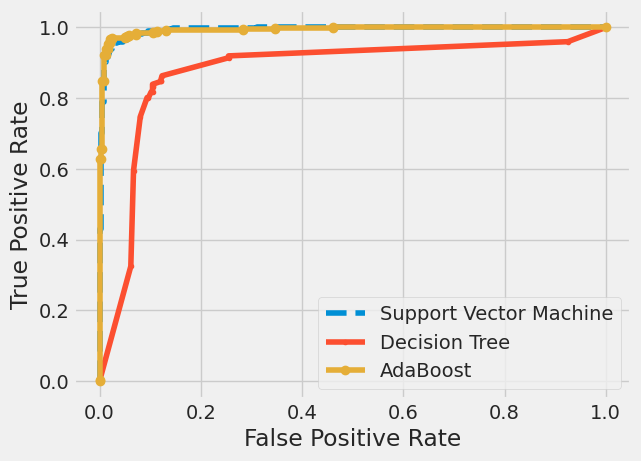

In [29]:
from tkinter.constants import Y
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
svm_probs = svm_grid_search.best_estimator_.predict_proba(X_val)
dt_probs = dt_grid_search.best_estimator_.predict_proba(X_val)
ada_probs = ada_grid_search.best_estimator_.predict_proba(X_val)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
ada_probs = ada_probs[:, 1]
# calculate scores
svm_auc = roc_auc_score(y_val, svm_probs)
dt_auc = roc_auc_score(y_val, dt_probs)
ada_auc = roc_auc_score(y_val, ada_probs)
# summarize scores
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('AdaBoost: ROC AUC=%.3f' % (ada_auc))
# calculate roc curves
sc_fpr, sc_tpr, _ = roc_curve(y_val, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_val, ada_probs)
# plot the roc curve for the model
plt.plot(sc_fpr, sc_tpr, linestyle='--', label='Support Vector Machine')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(ada_fpr, ada_tpr, marker='o', label='AdaBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Comparison Analysis:
> In terms of accuracy, AdaBoost has the highest at about 97%, however it is also the slowest to train. In contrast, Decision Tree trained the fastest, but sported the lowest accuracy at about 86%. SVM was the middle ground, with a 95% accuracy and training time in-between Decision Tree and AdaBoost.

> In cross validation, SVM proved to be the most consistent with the smallest amount of deviation between the 5 folds. It was also again quite a bit faster than AdaBoost, so it is the best choice for consistency and efficiency.

# **5. Model Saving for Streamlit Deployment**

In [13]:
#Train Final Pipeline on All Training Data

print("Training pipelines on all available training data...")

# Train pipelines on the complete training set
svm_pipeline.fit(X, y)
dt_pipeline.fit(X, y)
ada_pipeline.fit(X, y)

print("Pipelines trained successfully!")

# Test pipeline performance on validation set
svm_pipeline_predictions = svm_pipeline.predict(X_val)
dt_pipeline_predictions = dt_pipeline.predict(X_val)
ada_pipeline_predictions = ada_pipeline.predict(X_val)

svm_pipeline_accuracy = metrics.accuracy_score(y_val, svm_pipeline_predictions)
dt_pipeline_accuracy = metrics.accuracy_score(y_val, dt_pipeline_predictions)
ada_pipeline_accuracy = metrics.accuracy_score(y_val, ada_pipeline_predictions)

print("Final Pipeline Results:")
print(f"SVM validation accuracy: {svm_pipeline_accuracy:.4f}")
print(f"Decision Tree validation accuracy: {dt_pipeline_accuracy:.4f}")
print(f"AdaBoost validation accuracy: {ada_pipeline_accuracy:.4f}")

# Show detailed classification report
print("\n=======Classification Report===========")
print("Support Vector Machine:\n", metrics.classification_report(y_val, svm_pipeline_predictions, target_names=['Human','AI']))
print("Decision Tree:\n", metrics.classification_report(y_val, dt_pipeline_predictions, target_names=['Human', 'AI']))
print("AdaBoost:\n", metrics.classification_report(y_val, ada_pipeline_predictions, target_names=['Human', 'AI']))

Training pipelines on all available training data...
Pipelines trained successfully!
Final Pipeline Results:
SVM validation accuracy: 1.0000
Decision Tree validation accuracy: 0.9531
AdaBoost validation accuracy: 1.0000

=======Classification Report===========
Support Vector Machine:
               precision    recall  f1-score   support

       Human       1.00      1.00      1.00       373
          AI       1.00      1.00      1.00       373

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746

Decision Tree:
               precision    recall  f1-score   support

       Human       0.94      0.97      0.95       373
          AI       0.97      0.94      0.95       373

    accuracy                           0.95       746
   macro avg       0.95      0.95      0.95       746
weighted avg       0.95      0.95      0.95       746

AdaBoost:
               precision    recall

In [14]:
#Save Models for Streamlit Deployment

print("Saving models for Streamlit deployment...")

# Save the complete pipeline (includes TF-IDF + classifier)
pipeline_filename = 'ai_detection_pipeline.pkl'
joblib.dump(svm_pipeline, pipeline_filename)

# Also save individual components for flexibility
tfidf_filename = 'tfidf_vectorizer.pkl'
model_filename = 'svm_model.pkl'

vectorizer = svm_pipeline.named_steps['vectorizer']
svm_model = svm_pipeline.named_steps['classifier']
joblib.dump(vectorizer, tfidf_filename)
joblib.dump(svm_model, model_filename)

print("Models saved successfully!")
print(f"Complete pipeline: {pipeline_filename}")
print(f"TF-IDF vectorizer: {tfidf_filename}")
print(f"Best model: {model_filename}")

Saving models for Streamlit deployment...
Models saved successfully!
Complete pipeline: ai_detection_pipeline.pkl
TF-IDF vectorizer: tfidf_vectorizer.pkl
Best model: svm_model.pkl


In [16]:
# Save remaining classifiers (Decision Tree + AdaBoost)

print("Saving remaining models...")

# Save Decision Tree model
dt_filename = 'dt_model.pkl'
ada_filename = 'ada_model.pkl'

dt_model = dt_pipeline.named_steps['classifier']
ada_model = ada_pipeline.named_steps['classifier']
joblib.dump(dt_model, dt_filename)
joblib.dump(ada_model, ada_filename)

print("Models saved successfully!")
print(f"Decision Tree model: {dt_filename}")
print(f"AdaBoost model: {ada_filename}")

Saving remaining models...
Models saved successfully!
Decision Tree model: dt_model.pkl
AdaBoost model: ada_model.pkl
